# 👗 Virtual Try-On - Development Notebook

This notebook allows you to test the AI outfit generation independently from the web app.

## Prerequisites

1. **Create a `.env` file** in the project root with your Azure OpenAI credentials:
   ```
   AOAI_API_BASE=https://your-azure-openai-endpoint.openai.azure.com
   AOAI_DEPLOYMENT_NAME=gpt-image-1
   AOAI_API_VERSION=2025-04-01-preview
   ```

2. **Login to Azure CLI**:
   ```bash
   az login
   ```

3. **Set the images folder** - Update `IMAGES_FOLDER` in Step 2 below to point to your clothing images. 
   - Create an `images/` folder with your own images




---

## Step 1: Import Packages

In [ ]:
# =============================================================================
# STEP 1: Import required packages
# =============================================================================
# Run this cell first to load all dependencies

import os
import sys
import base64
import requests
import json
import glob
from IPython.display import display, Image
from azure.identity import DefaultAzureCredential
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()
print("✅ Packages loaded successfully!")

True

## Step 2: Configure Image Source

**Important:** Update `IMAGES_FOLDER` below to point to your clothing images.

Example paths:
- `./static/products/hosen` - Pants
- `./static/products/schuhe` - Shoes  
- `./static/products/pullover` - Tops/Sweaters
- `./images` - Your own custom folder

In [ ]:
# =============================================================================
# STEP 2: Configure image source and Azure settings
# =============================================================================
# ⬇️ CHANGE THIS PATH to point to your clothing images ⬇️
IMAGES_FOLDER = os.getenv("IMAGES_FOLDER", "./static/products/hosen")

# Output path (generated images will be saved here)
OUTPUT_IMAGE_PATH = os.getenv("OUTPUT_IMAGE_PATH", "./static/generated/notebook_output.jpeg")

# Azure OpenAI settings (loaded from .env file)
AOAI_API_BASE = os.getenv("AOAI_API_BASE")
AOAI_DEPLOYMENT_NAME = os.getenv("AOAI_DEPLOYMENT_NAME", "gpt-image-1")
AOAI_API_VERSION = os.getenv("AOAI_API_VERSION", "2025-04-01-preview")

# Validate Azure configuration
if not AOAI_API_BASE:
    raise ValueError(
        "❌ AOAI_API_BASE not found!\n"
        "Please create a .env file with:\n"
        "   AOAI_API_BASE=https://your-endpoint.openai.azure.com"
    )

print("✅ Configuration loaded:")
print(f"   API Base: {AOAI_API_BASE}")
print(f"   Deployment: {AOAI_DEPLOYMENT_NAME}")
print(f"   Images Folder: {IMAGES_FOLDER}")
print(f"   Output Path: {OUTPUT_IMAGE_PATH}")

# Find all images in the folder
image_files = sorted(
    glob.glob(f"{IMAGES_FOLDER}/*.jpg") + 
    glob.glob(f"{IMAGES_FOLDER}/*.jpeg") + 
    glob.glob(f"{IMAGES_FOLDER}/*.png")
)
# Exclude any output/generated images
image_files = [f for f in image_files if 'output' not in os.path.basename(f).lower() 
               and 'generated' not in os.path.basename(f).lower()]

if not image_files:
    print(f"\n⚠️ No images found in: {IMAGES_FOLDER}")
    print("   Please update IMAGES_FOLDER path above.")
else:
    print(f"\n📸 Found {len(image_files)} clothing images:")
    for img in image_files:
        print(f"   • {os.path.basename(img)}")

Configuration loaded:
  API Base: https://syrinechelly-agentic-resource.cognitiveservices.azure.com
  Deployment: gpt-image-1
  Images Folder: ./images3

Found 4 clothing item images:
  - cap.jpg
  - jeans.jpg
  - sneakers.jpg
  - t-shirt.jpg


## Step 3: Preview Clothing Items

Run the cell below to see all images that will be combined into an outfit.


Cap:


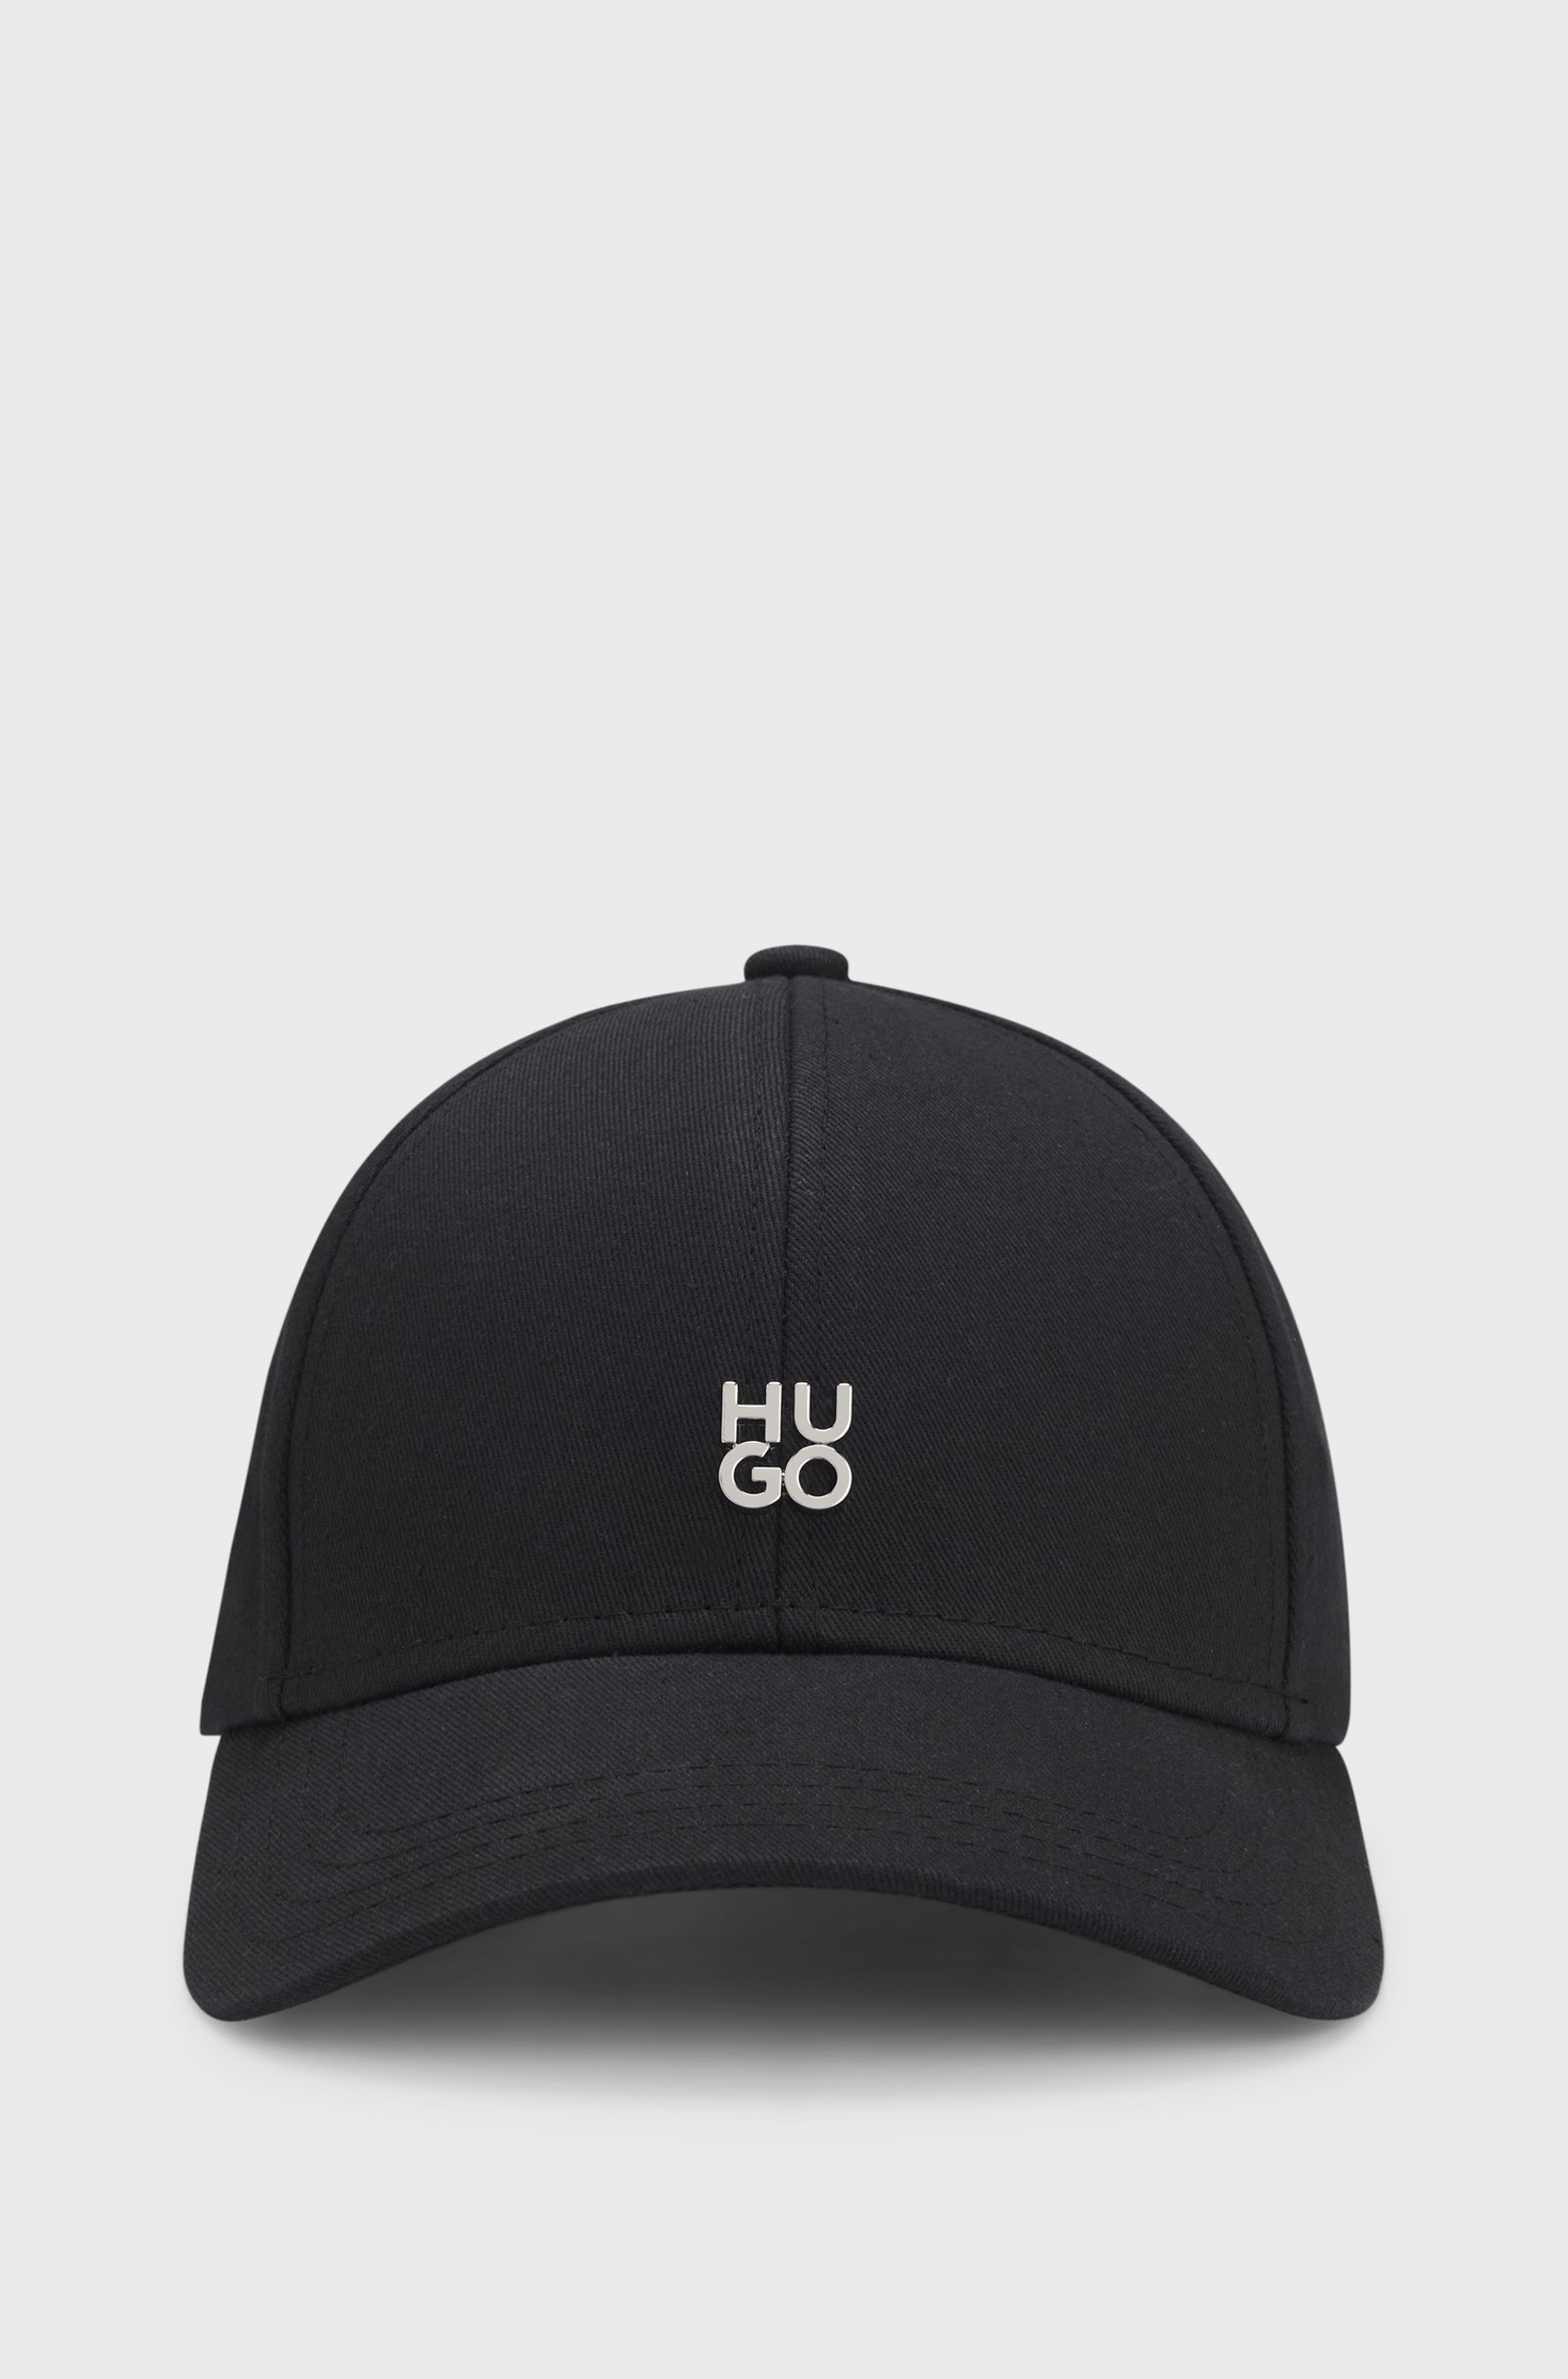


Jeans:


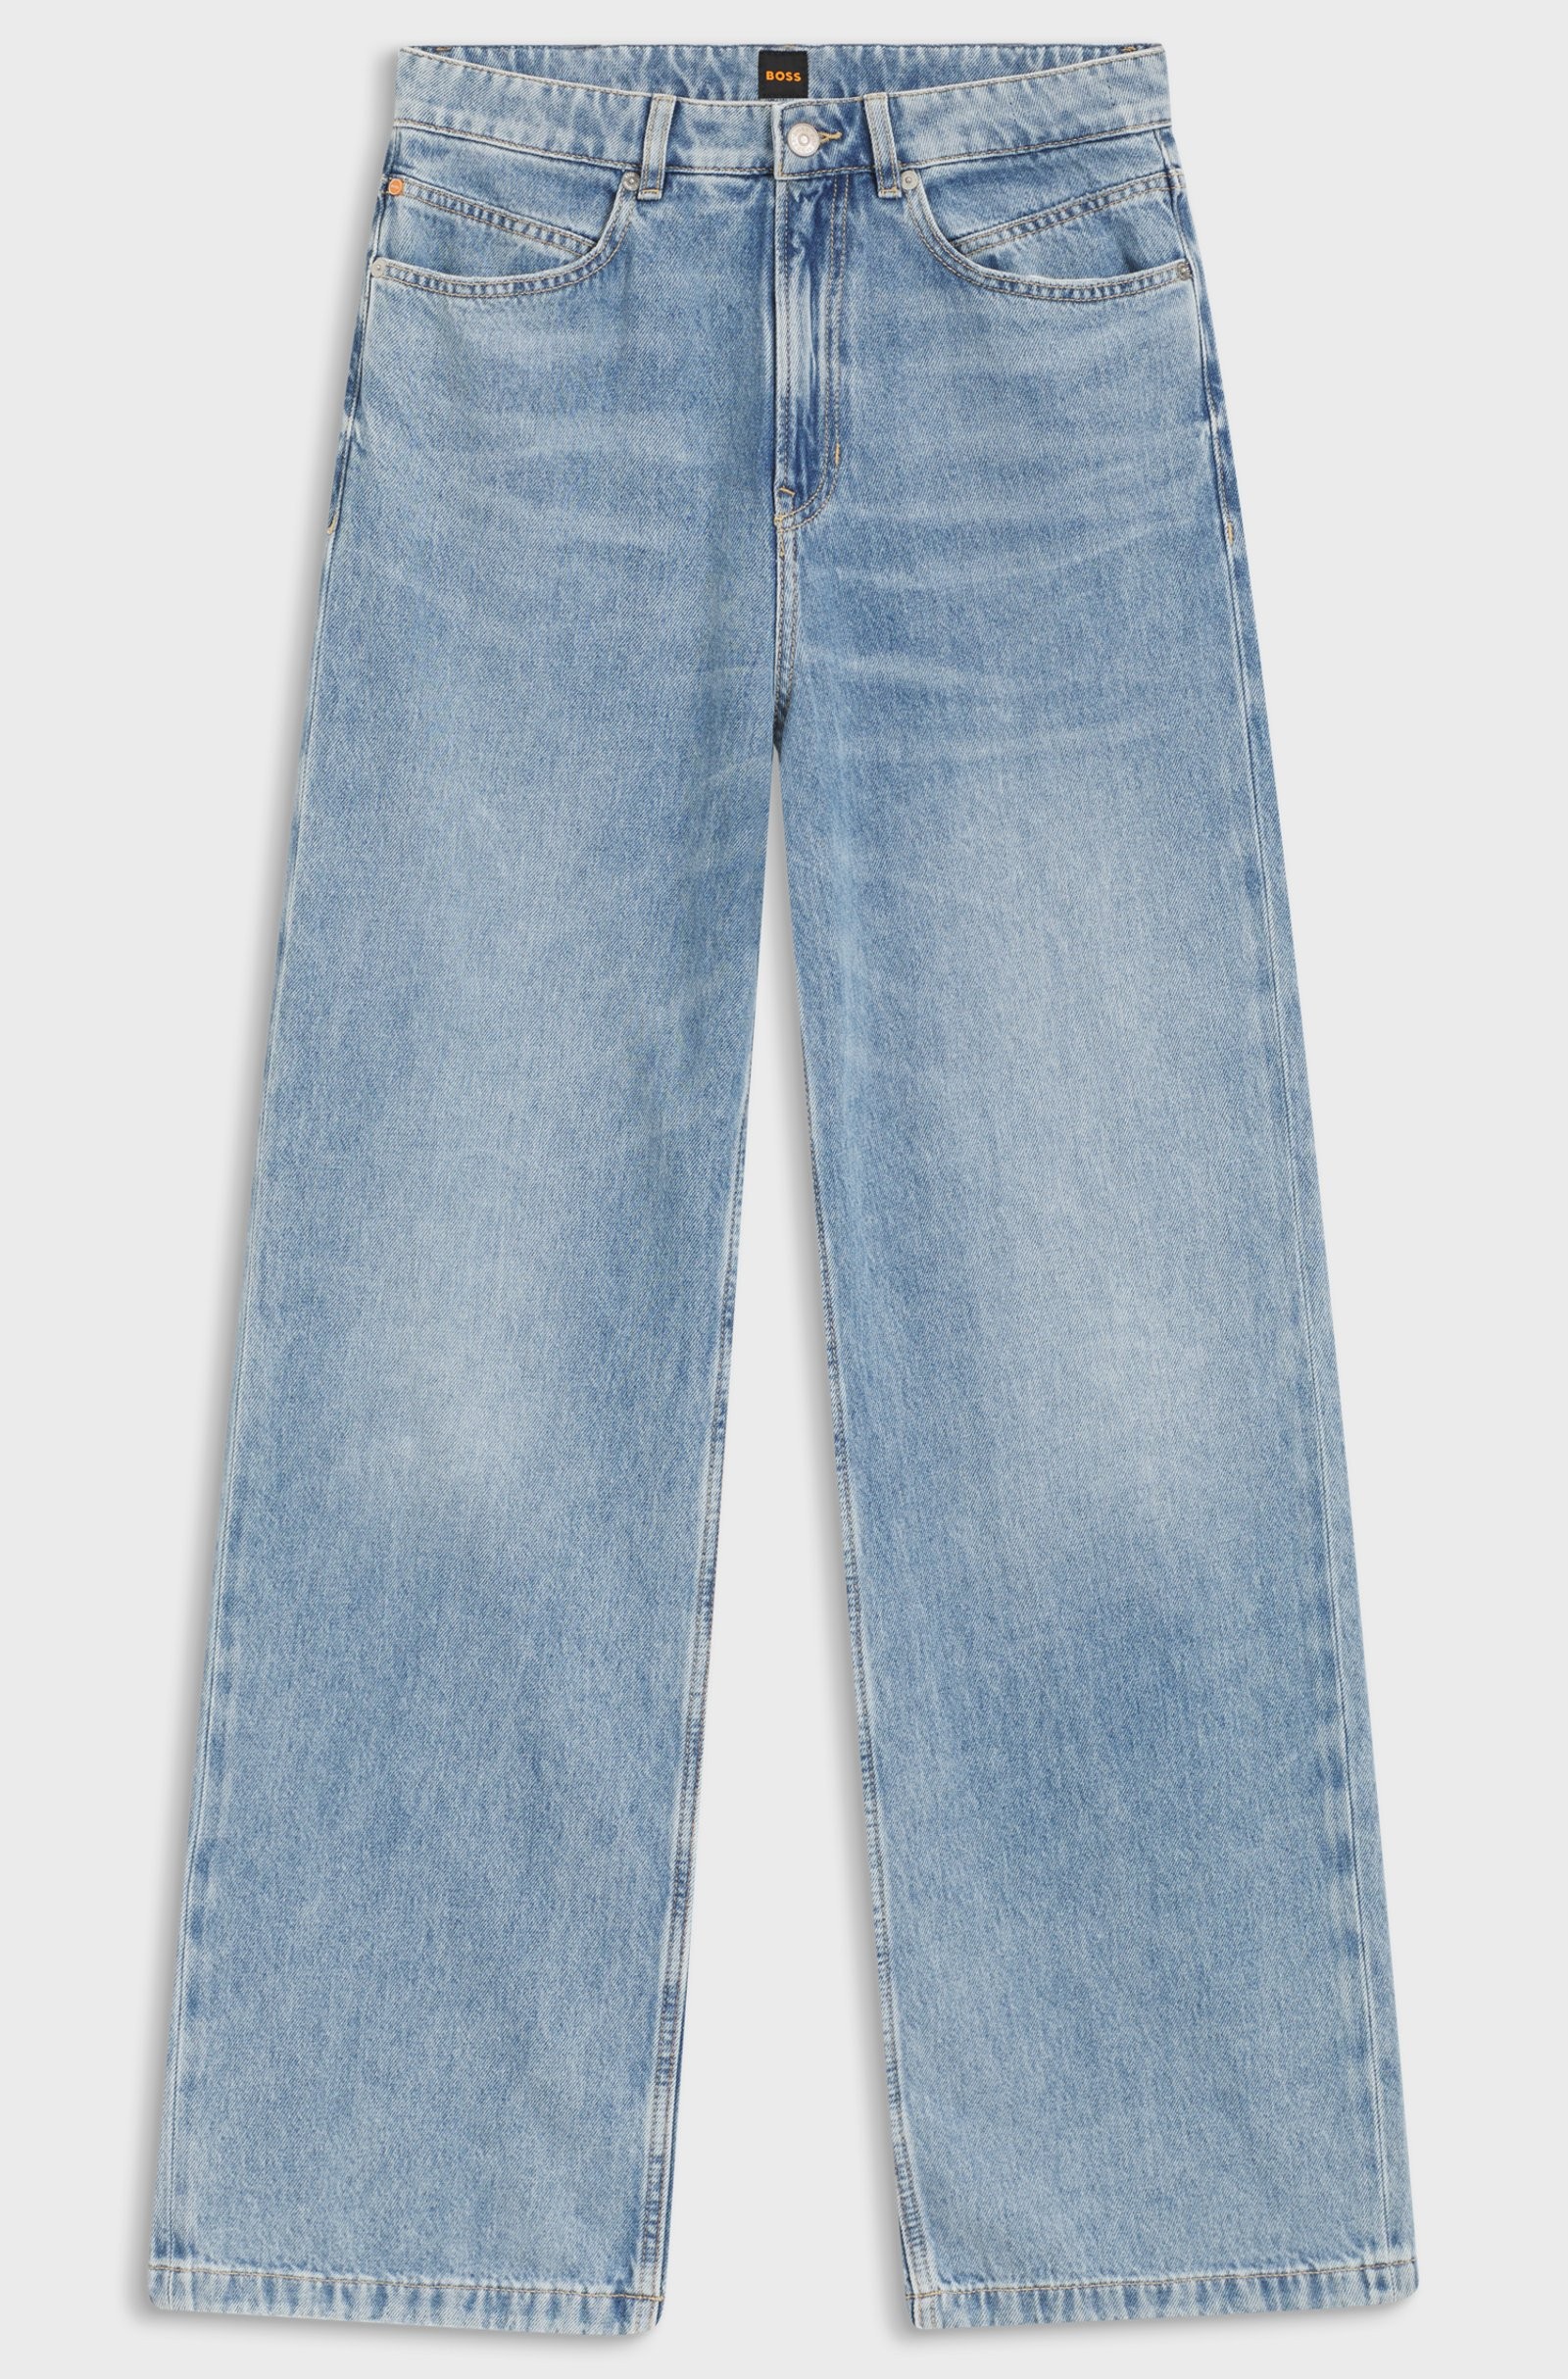


Sneakers:


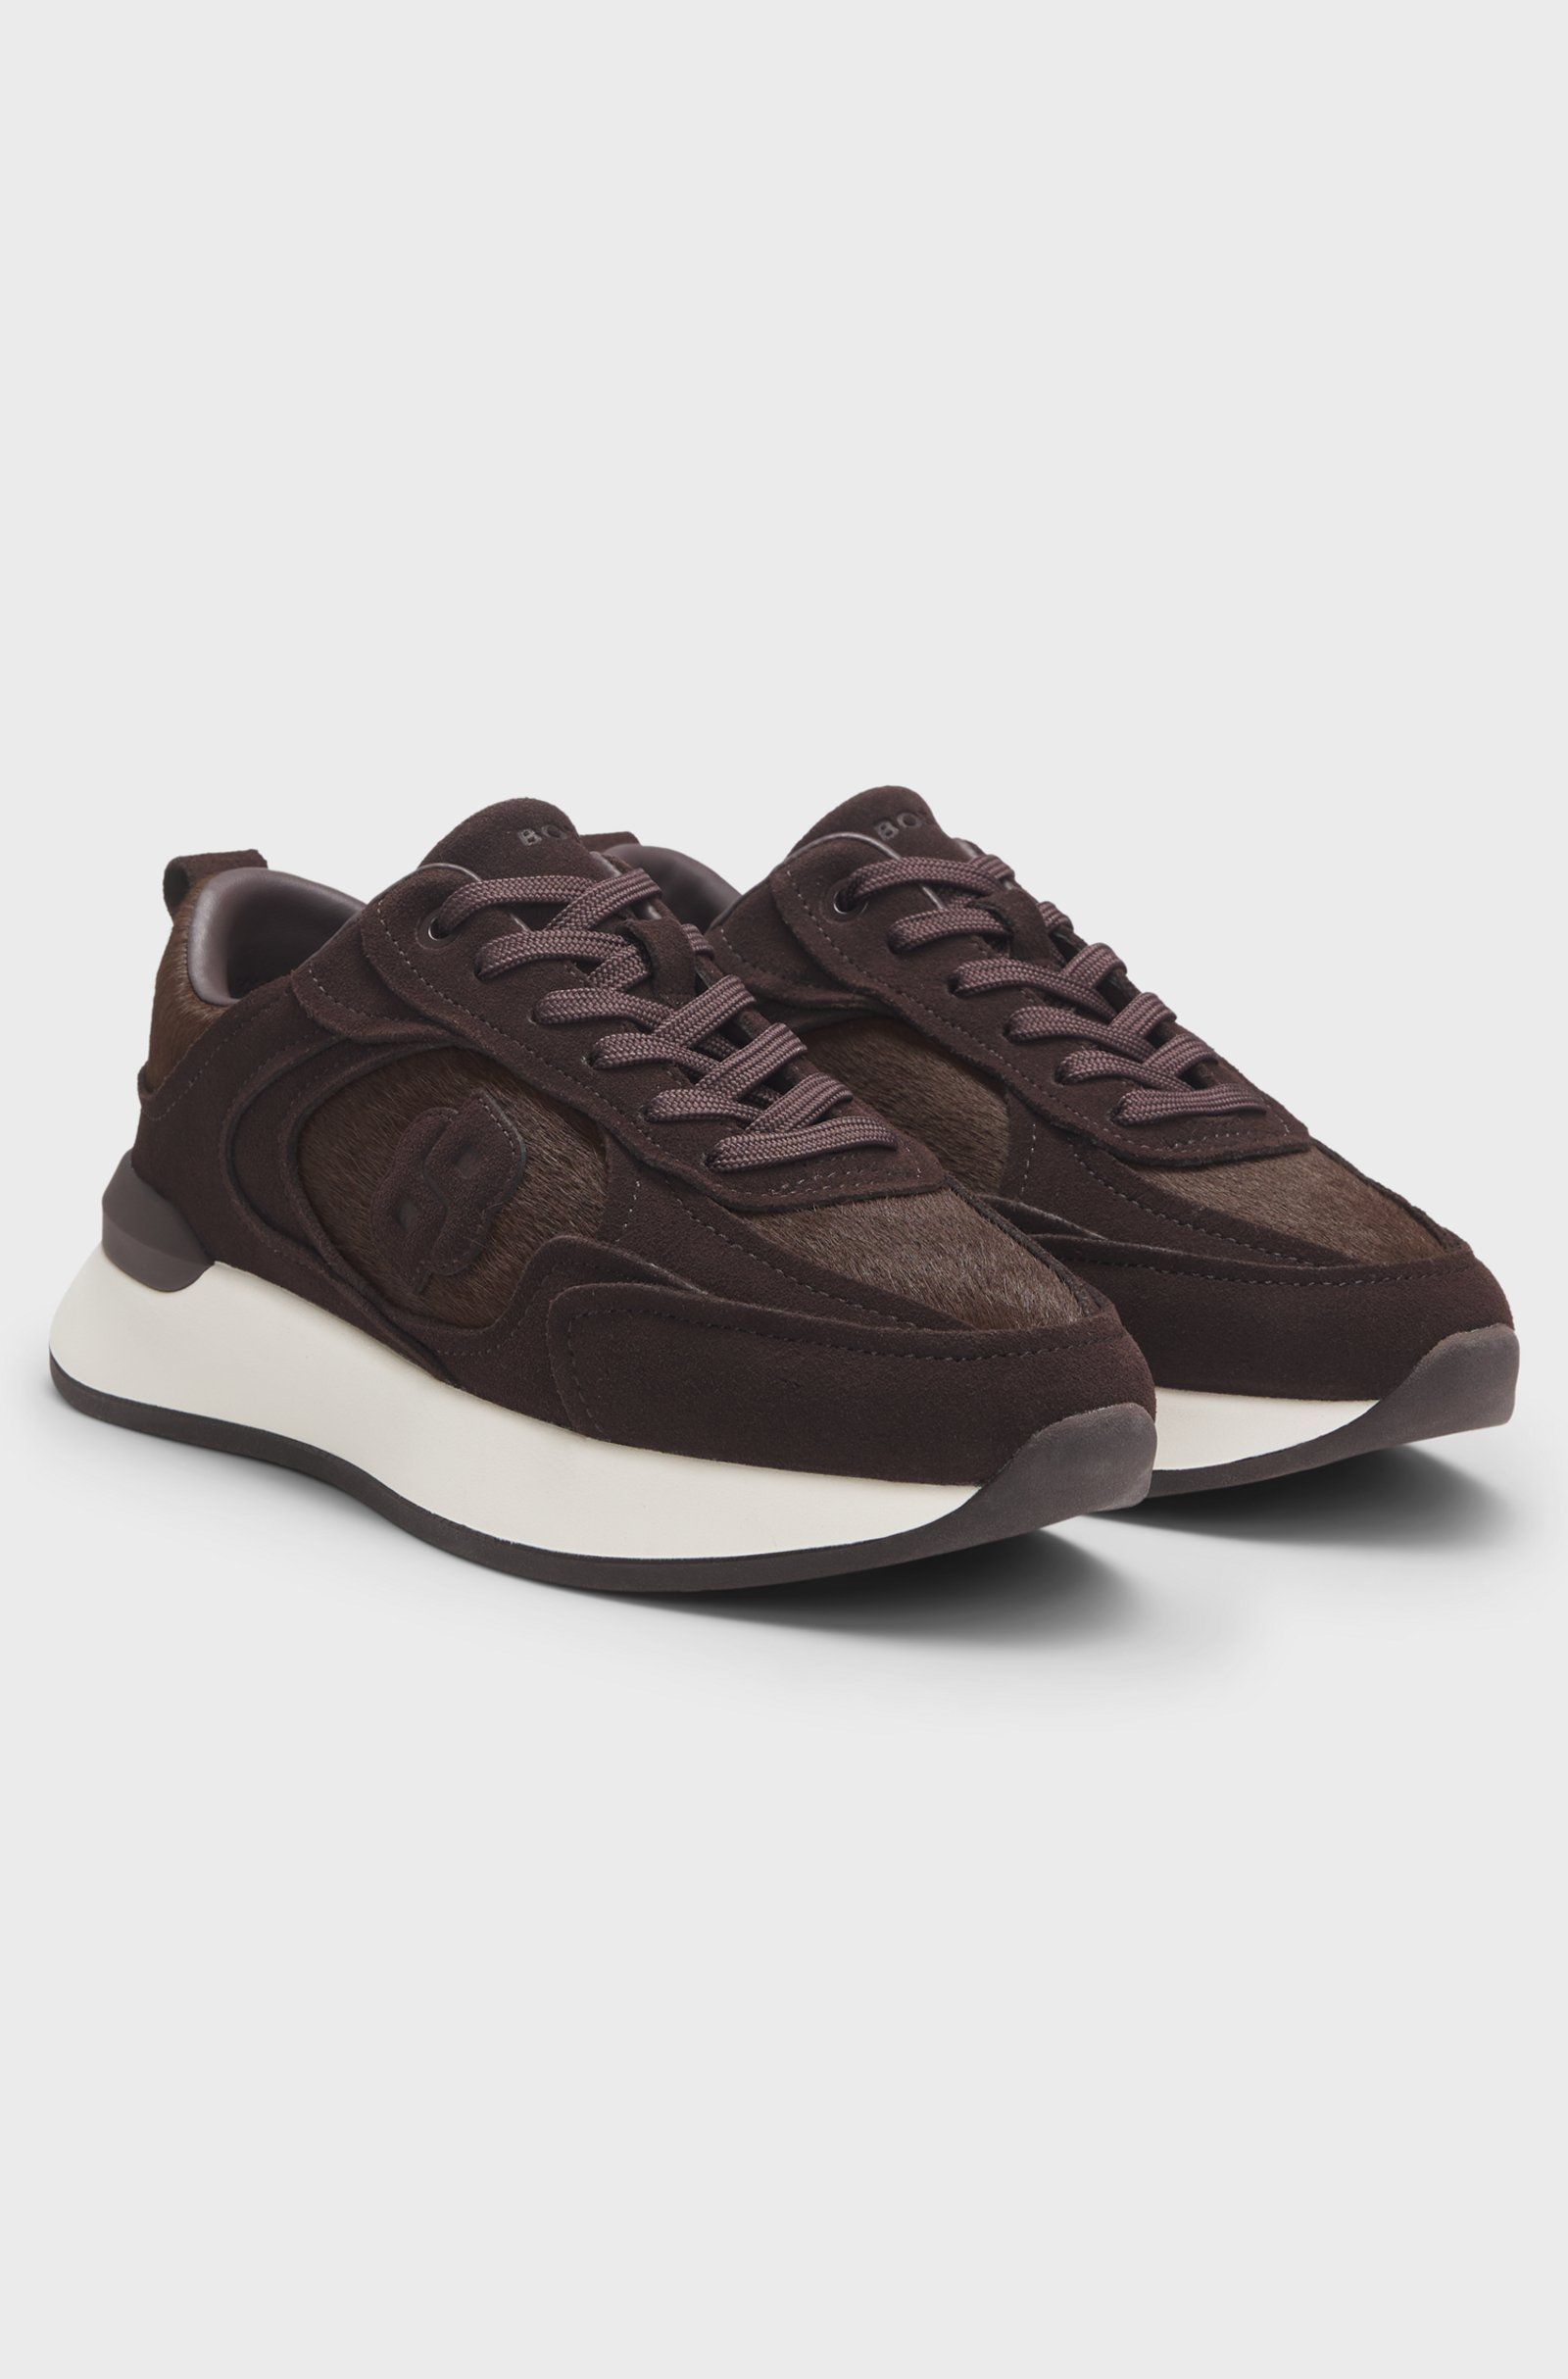


T-Shirt:


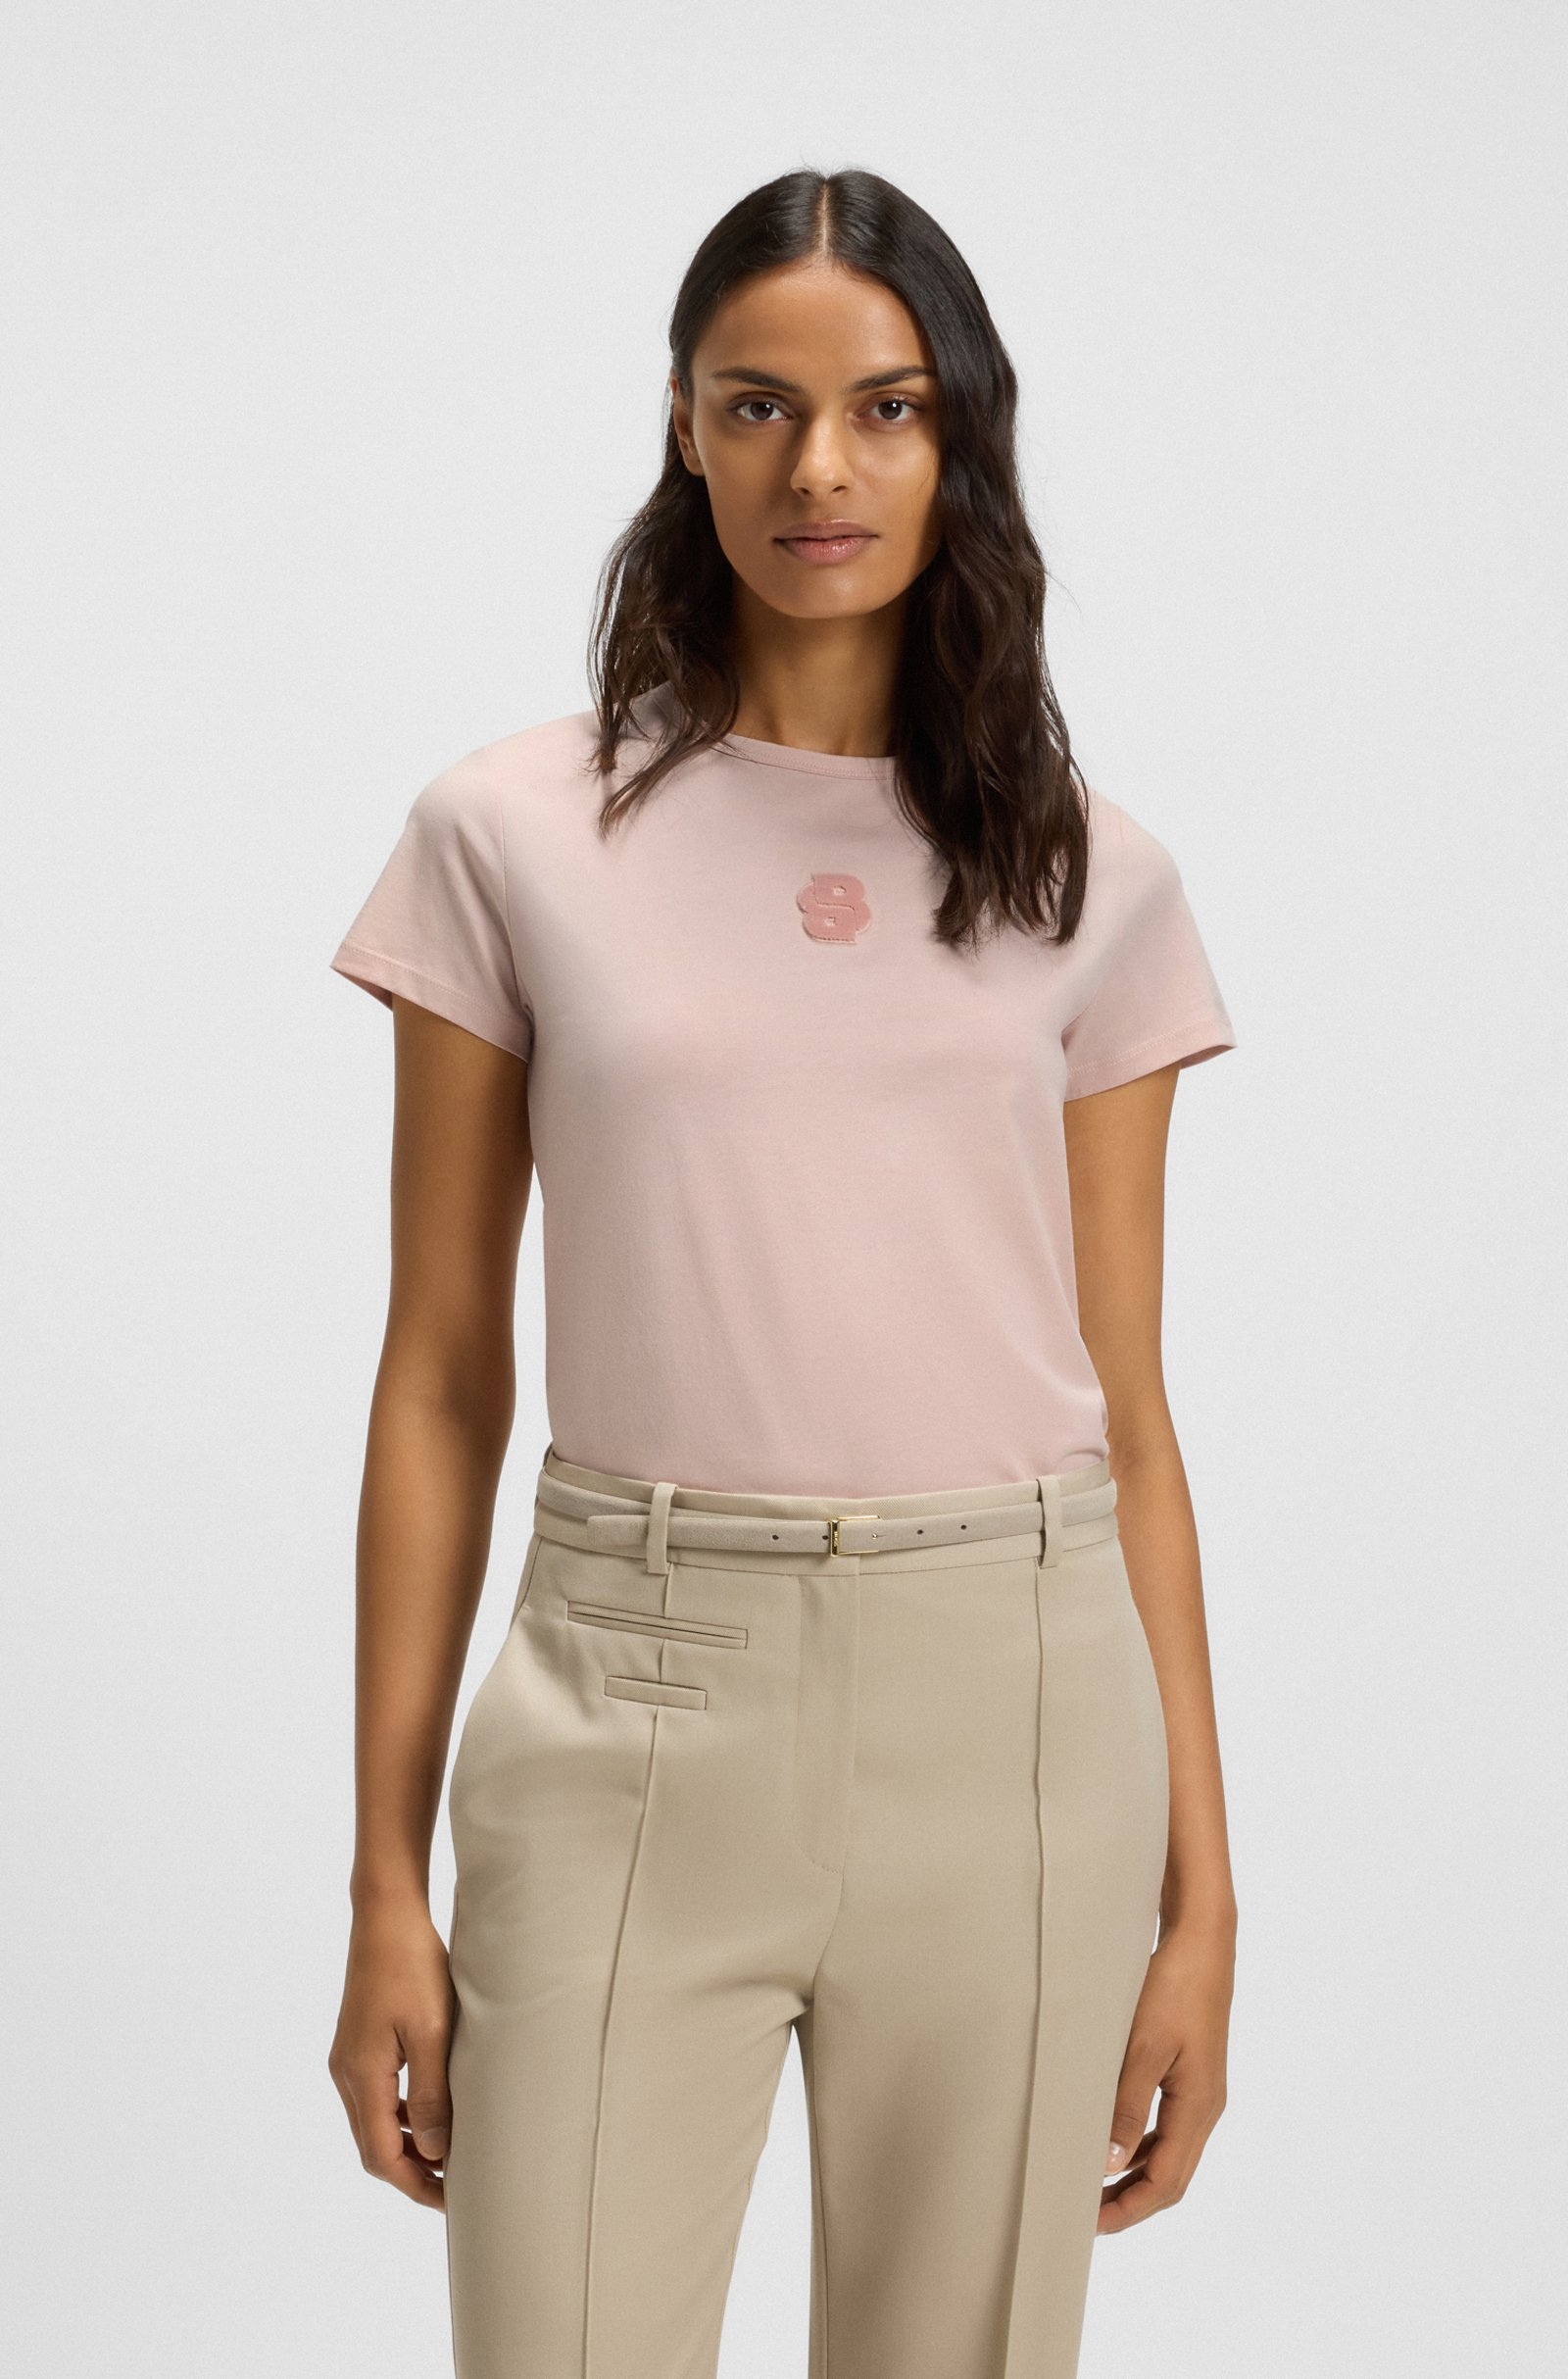

In [ ]:
# =============================================================================
# STEP 3: Preview clothing items
# =============================================================================

def show_image(image_path, title=""):
    """Display an image in the notebook."""
    try:
        if title:
            print(f"\n{title}")
        display(Image(filename=image_path, width=300))
    except Exception as e:
        print(f"❌ Could not display {image_path}: {e}")

# Display all clothing items
if image_files:
    print("👕 Clothing items to combine:\n")
    for img_path in image_files:
        item_name = os.path.splitext(os.path.basename(img_path))[0].replace("-", " ").title()
        show_image(img_path, f"📌 {item_name}")
else:
    print("⚠️ No images to display. Update IMAGES_FOLDER in Step 2.")

**Generate Combined Outfit Image**

In [4]:
# Construct API URL for image editing with multiple inputs
API_URL = f"{AOAI_API_BASE}/openai/deployments/{AOAI_DEPLOYMENT_NAME}/images/edits?api-version={AOAI_API_VERSION}"

In [5]:
# Build dynamic prompt based on image files
prompt_items = []
item_names = []

for idx, img_path in enumerate(image_files, 1):
    filename = os.path.basename(img_path)
    item_name = os.path.splitext(filename)[0]
    item_names.append(item_name)
    prompt_items.append(f"- Image {idx} ({filename}): Extract ONLY the {item_name}")

PROMPT = f"""Create a professional fashion photography of an attractive female model wearing these clothing items as a complete outfit:

{chr(10).join(prompt_items)}

CRITICAL INSTRUCTIONS:
- Extract and use ONLY the clothing item that matches each filename
- Ignore any other items visible in the images
- The outfit must contain ONLY these items: {", ".join(item_names)}
- Do not add any other clothing items or accessories

STYLE REQUIREMENTS:
- Clean white or light gray background
- Professional studio lighting
- Natural, elegant pose
- Full body shot from head to feet (no cropping)
- All items clearly visible and accurately represented

"""

print(f"Generated prompt for {len(item_names)} items: {', '.join(item_names)}")
print("\nFull prompt:")
print(PROMPT)

Generated prompt for 4 items: cap, jeans, sneakers, t-shirt

Full prompt:
Create a professional fashion photography of an attractive female model wearing these clothing items as a complete outfit:

- Image 1 (cap.jpg): Extract ONLY the cap
- Image 2 (jeans.jpg): Extract ONLY the jeans
- Image 3 (sneakers.jpg): Extract ONLY the sneakers
- Image 4 (t-shirt.jpg): Extract ONLY the t-shirt

CRITICAL INSTRUCTIONS:
- Extract and use ONLY the clothing item that matches each filename
- Ignore any other items visible in the images
- The outfit must contain ONLY these items: cap, jeans, sneakers, t-shirt
- Do not add any other clothing items or accessories

STYLE REQUIREMENTS:
- Clean white or light gray background
- Professional studio lighting
- Natural, elegant pose
- Full body shot from head to feet (no cropping)
- All items clearly visible and accurately represented





Making API call to generate combined outfit image...
Using 4 input images
API call successful!
Combined outfit image saved to: ./output_image_combined.jpeg

--- Generated Outfit Image ---
API call successful!
Combined outfit image saved to: ./output_image_combined.jpeg

--- Generated Outfit Image ---


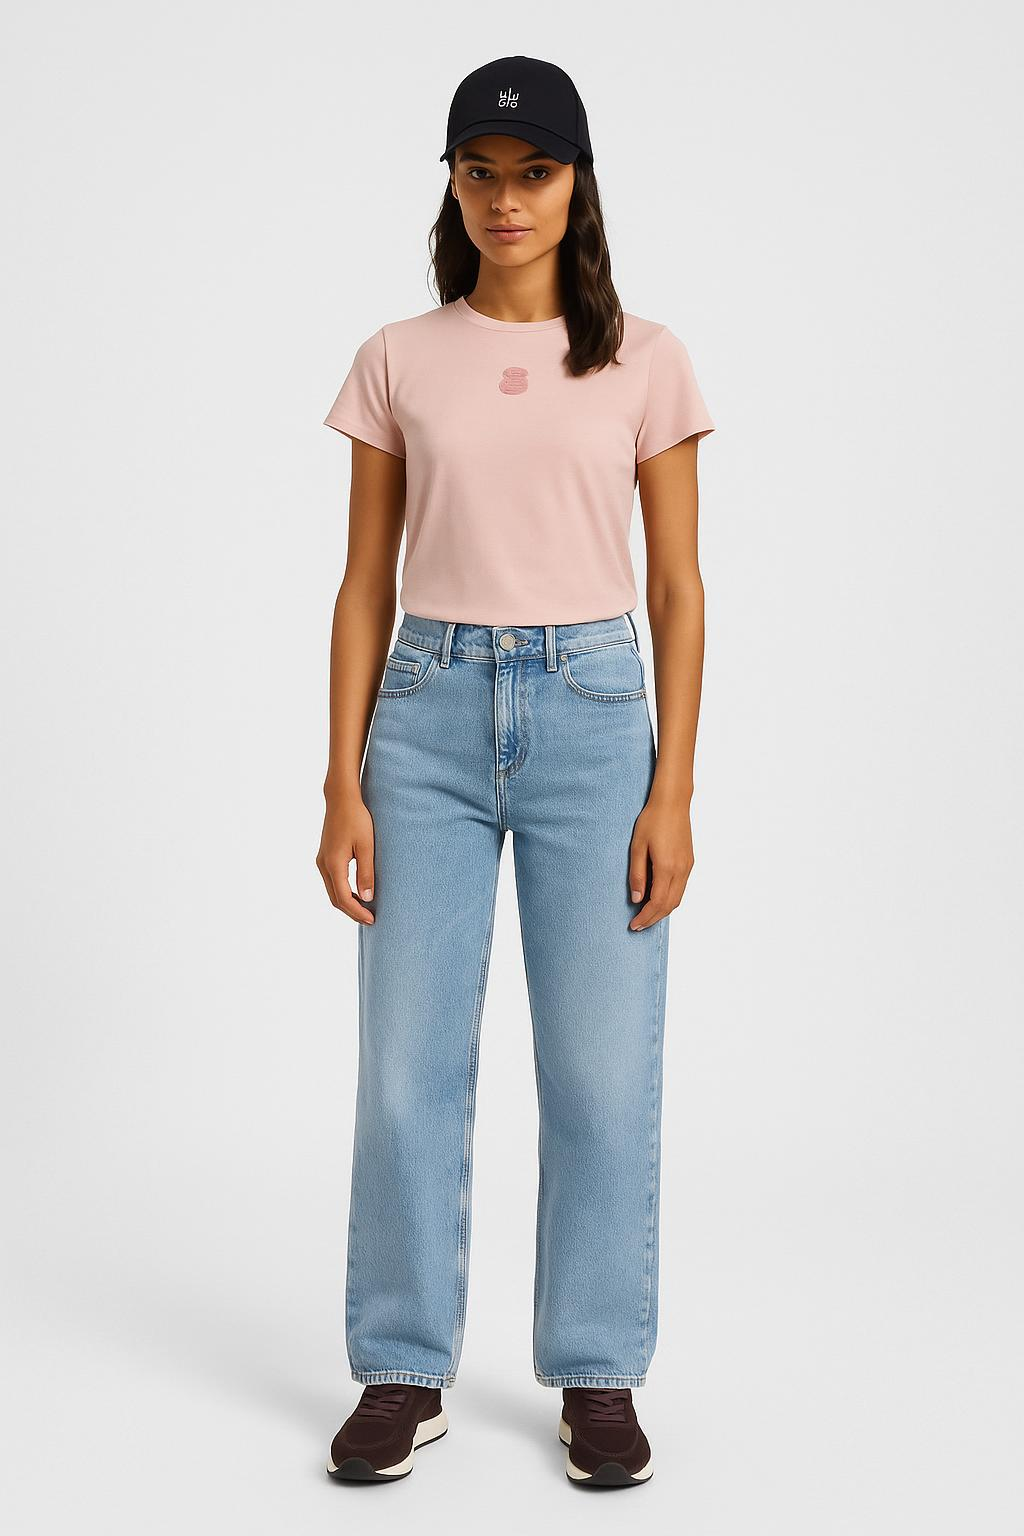

In [6]:
# Call Image Edit API with multiple images
try:
    # Open all clothing item images and prepare files array
    file_handles = []
    files = []
    
    for img_path in image_files:
        file_handle = open(img_path, "rb")
        file_handles.append(file_handle)
        files.append(("image[]", (os.path.basename(img_path), file_handle, "image/jpeg")))
    
    try:
        # Input parameters - use vertical format for full body shots
        data = {
            "prompt": PROMPT,
            "model": "gpt-image-1",
            "n": 1,
            "size": "1024x1536",  # Vertical format to show full body from head to feet
            "quality": "high",
            "output_format": "jpeg",
            "output_compression": 100
        }

        # Entra ID Auth
        credential = DefaultAzureCredential()
        token = credential.get_token("https://cognitiveservices.azure.com/.default")
        headers = {
            "Authorization": f"Bearer {token.token}"
        }

        # Image API request
        print(f"\nMaking API call to generate combined outfit image...")
        print(f"Using {len(files)} input images")
        response = requests.post(
            API_URL,
            headers=headers,
            files=files,
            data=data
        )

        if response.status_code == 200:
            print("API call successful!")
            response_data = response.json()

            generated_image_b64 = None
            if 'data' in response_data and isinstance(response_data['data'], list) and len(response_data['data']) > 0:
                generated_image_b64 = response_data['data'][0].get('b64_json')

            if generated_image_b64:
                decoded_image_data = base64.b64decode(generated_image_b64)
                with open(OUTPUT_IMAGE_PATH, "wb") as f:
                    f.write(decoded_image_data)
                print(f"Combined outfit image saved to: {OUTPUT_IMAGE_PATH}")

                print("\n--- Generated Outfit Image ---")
                show_image(OUTPUT_IMAGE_PATH, "")
            else:
                print("Something went wrong:\n", json.dumps(response_data, indent=2), file=sys.stderr)

        else:
            print(f"\nAPI call failed with status code: {response.status_code}", file=sys.stderr)
            print(f"Response: {response.text}", file=sys.stderr)
    
    finally:
        # Close all file handles
        for fh in file_handles:
            fh.close()

except Exception as e:
    print(f"An unexpected error occurred: {e}", file=sys.stderr)